### 오차제곱합

In [2]:
import numpy as np

def sum_squares_error(y,t) :
    return 0.5 * np.sum((y-t)**2)

# 정답은 2 (2번째 원소가 1 -> 원-핫 코딩)
t = [0,0,1,0,0,0,0,0,0,0]

# 예 1 : '2'일 확률이 가장 높다고 추정 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sse1 = sum_squares_error(np.array(y), np.array(t))
print(sse1)                 # 0.09750000000000003

# 예 2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sse2 = sum_squares_error(np.array(y2), np.array(t))
print(sse2)                 # 0.5975


0.5975

****
### 교차 엔트로피

In [5]:
def cross_entropy_error(y,t) : 
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))               # 0.510825457099338

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y2), np.array(t))              # 2.302584092994546


2.302584092994546

****
### 미니배치

In [17]:
import numpy as np
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

# 4.2.3 미니배치 학습
# 훈련 데이터 전체에 대한 오차함수
# E = -1/N * ∑ _n (∑ _k (tk * log(yk)))
# N : 데이터의 개수
# 훈련 데이터 전체에 대한 손실 함수를 계산하기에는 시간이 오래걸리기 때문에
# 일부를 추려 전체의 근사치로 이용할 수 있다.
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # 원-핫 인코딩 된 정답 레이블 (60000, 10)

# 무작위 10개 추출
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)   # 미니배치 지정 -> np.array로 출력
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


# 4.2.4 (배치용) 교차 엔트로피 오차 구현하기
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t])) / batch_size


# 4.2.5 왜 손실 함수를 설정하는가?
# 신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다.
# 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.
# (매개변수의 미소한 변화에는 거의 반응을 보이지 않고 그 값이 분연속적으로 변화)


(60000, 784)
(60000, 10)


In [ ]:
# (배치용) 교차 엔트로피 오차 구현하기

def cross_entropy_error_batch(y,t) :
    if y.dim == 1 :
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7)) / batch_size

***
### 수치 미분

In [9]:
import numpy as np
import matplotlib.pylab as plt


# 4.3.1 미분
# 나쁜 구현 예
def numerical_diff_bad(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h
# 1. 반올림 오차 -> 해결 : h값이 너무 작아 반올림 오차를 일으킬 수 있음 10e-4정도가 적당하다고 알려짐
# 2. 함수 f의 차분 : 전방 차분에서는 차분이 0이 될 수 없어 오차가 발생
#  -> 해결 : 오차를 줄이기 위해 중심 차분(중앙 차분)을 사용

# 개선
def numerical_diff(f, x):
    h = 10e-4               # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)


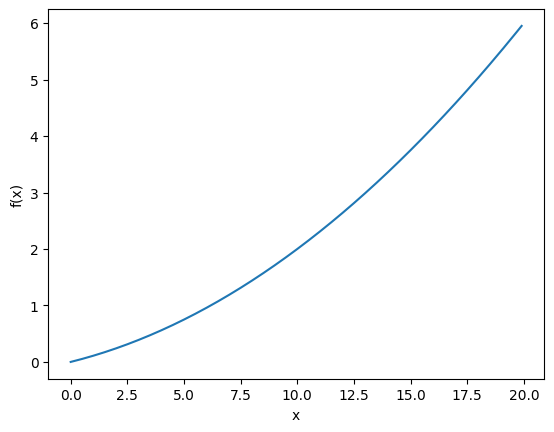

In [10]:
# 4.3.2 수치 미분의 예
# 수치 미분 : 아주 작은 차분으로 미분, 근사치로 계산
# 해석적 미분 : 학교에서 배운 일반적인 미분 (전방 차분 이용)
 
# y = 0.01x² + 0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x


x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 간격 0.1인 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [11]:
# x = 5, 10일때 미분
# 함수 자체를 넘겨줌
print(numerical_diff(function_1, 5))   # 0.200000000000089
print(numerical_diff(function_1, 10))  # 0.29999999999996696

0.200000000000089
0.29999999999996696


<function tangent_line.<locals>.<lambda> at 0x000001BFFB360B80>


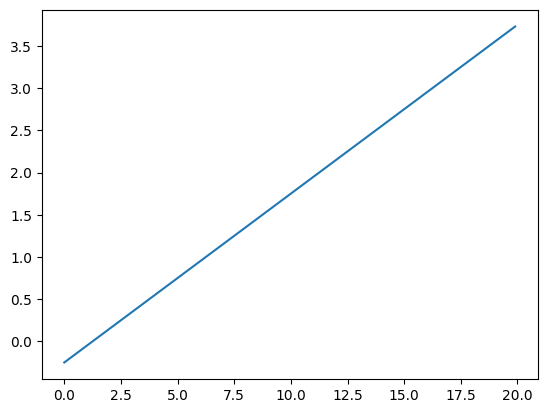

In [14]:
# 접선의 함수를 구하는 함수
def tangent_line(f, x):
        d = numerical_diff(f, x)
        # print(d)
        y = f(x) - d*x
        return lambda t: d*t + y


tf = tangent_line(function_1, 5)                # function_1 함수의 x=5 지점에서의 접선
y2 = tf(x)                                      # x 지점에서의 x=5 접선 위 y값 반환
plt.plot(x, y2)
plt.show()

In [15]:
# 4.3.3 편미분
# f(x0, x1) = x0² + x1²
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

# x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라.
def function_tmp1(x0):
    return x0**2 + 4.0**2.0


# x0 = 3, x1 = 4일 때, x1에 대한 편미분을 구하라.
def function_tmp2(x1):
    return 3.0**2.0 + x1 * x1


print(numerical_diff(function_tmp1, 3.0))  # 5.999999999998451
print(numerical_diff(function_tmp2, 4.0))  # 8.000000000000895

5.999999999998451
8.000000000000895


***
### 기울기

In [3]:
import numpy as np
import matplotlib.pylab as plt


# 앞 절에서 x0, x1에 대한 편미분을 변수별로 따로 계산했음.
# x0, x1의 편미분을 동시에 계산하고 싶다면?
# x0 = 3, x1 = 4일 때 (x0, x1) 양쪽의 편미분을 묶어 벡터로 정리한 것을 기울기gradient라고 한다.
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)             # f(x+h)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)             # f(x-h)

        grad[idx] = (fxh1 - fxh2) / (2 * h)     # 중심차분(중앙차분)을 이용한 기울기 계산
        x[idx] = tmp_val  # 값 복원

    return grad


# f(x0, x1) = x0² + x1²
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)


print(numerical_gradient(function_2, np.array([3.0, 4.0])))  # [ 6.  8.]
print(numerical_gradient(function_2, np.array([0.0, 2.0])))  # [ 0.  4.]
print(numerical_gradient(function_2, np.array([3.0, 0.0])))  # [ 6.  0.]


[6. 8.]
[0. 4.]
[6. 0.]


***
### 경사법

[-6.11110793e-10  8.14814391e-10]
[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


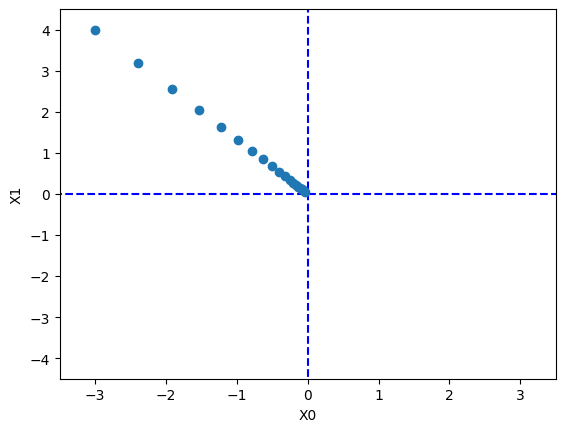

In [4]:
# 4.4.1 경사법(경사 하강법)
# x0 = x0 - η*∂f/∂x0
# x1 = x1 - η*∂f/∂x1
# η(eta) : 갱신하는 양, 학습률learning rate
# 위 식을 반복


# f:최적화하려는 함수
# init_x : 초깃값
# lr : 학습률
# step_num : 반복횟수

import numpy as np

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []      # x가 변해온 모든 값을 저장

    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)     # 기울기 계산 (중심 차분) == 해당 지점에서의 미분 값
        x -= lr * grad                      # 갱신된 x값

    return x, np.array(x_history)           # 최종 갱신 값과 갱신 히스토리 반환


# 경사법으로 f(x0, x1) = x0² + x1²의 최솟값을 구해라
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1)
print(x)  # [ -6.11110793e-10   8.14814391e-10]

# 학습률이 너무 큼
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=10.0)
print(x)  # [ -2.58983747e+13  -1.29524862e+12] 발산함

# 학습률이 너무 작음
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=1e-10)
print(x)  # [-2.99999994  3.99999992] 거의 변화 없음

# 그래프
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=20)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o') # x0, x1

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [16]:
import sys
import os
import numpy as np
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


# 4.4.2 신경망에서의 기울기
class simpleNet:
    """docstring for simpleNet"""
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)        # Input x 가중치

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)                      # 예측값
        loss = cross_entropy_error(y, t)    # 손실함수값 (교차 엔트로피 에러)

        return loss


net = simpleNet()
print(net.W)  # 가중치 매개변수(랜덤)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))  # 최댓값의 인덱스

t = np.array([0, 0, 1])  # 정답 레이블
print(net.loss(x, t))


def f(W):
    return net.loss(x, t)


dW = numerical_gradient(f, net.W)
print(dW)


[[ 0.66623344  0.78763903 -1.13161613]
 [-0.23621657 -0.75559489  0.28235737]]
[ 0.18714515 -0.20745199 -0.42484804]
0
1.4077964310763427
[[ 0.27073119  0.18245969 -0.45319088]
 [ 0.40609679  0.27368954 -0.67978632]]


***
### 2층 신경망 클래스 구현
- two_layer_net.py

***
### 미니배치 학습 구현
- train_neuralnet.py